In [35]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
#from dotenv import load_dotenv
from tueplots import bundles
from tueplots.constants.color import rgb

In [9]:
#final_df = pd.read_csv('../all_data/all-data-best-city.csv', index_col=0)

In [10]:
os.getenv("DATASET_PATH")

'/Users/kayoonkim/Documents/2023-wise/data-literacy/city-recsys/all_data/all-data-best-city.csv'

In [11]:
final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)

In [12]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [13]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [14]:
#final_df = final_df.drop(['rank_cost_living', 'rank_traffic','rank_safety'], axis=1)
#final_df.head()

In [15]:
# Define variables for best mean temperature and best std deviation value
best_mean_tmp = 20
best_std_dev_tmp = 10

In [16]:
"""
# Testing for temperature 
final_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])
final_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])

final_df.head()
"""

"\n# Testing for temperature \nfinal_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])\nfinal_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])\n\nfinal_df.head()\n"

In [17]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [18]:
# Min-Max Scaling all our indexes
final_df['scaled_cost_live_rent_index'] = 1 - ( (final_df['cost_live_rent_index'] - final_df['cost_live_rent_index'].min()) /
                                           (final_df['cost_live_rent_index'].max() - final_df['cost_live_rent_index'].min()) )
final_df['scaled_purchase_pow_index'] = ( (final_df['purchase_pow_index'] - final_df['purchase_pow_index'].min()) /
                                           (final_df['purchase_pow_index'].max() - final_df['purchase_pow_index'].min()) )
final_df['scaled_safety_index'] = ( (final_df['safety_index'] - final_df['safety_index'].min()) /
                                           (final_df['safety_index'].max() - final_df['safety_index'].min()) )
final_df['scaled_pollution_index'] = 1 - ( (final_df['pollution_index'] - final_df['pollution_index'].min()) /
                                           (final_df['pollution_index'].max() - final_df['pollution_index'].min()) )
final_df['scaled_trffic_min_index'] = 1 - ( (final_df['trffic_min_index'] - final_df['trffic_min_index'].min()) /
                                           (final_df['trffic_min_index'].max() - final_df['trffic_min_index'].min()) )
final_df['scaled_mean_tmp'] = ( (final_df['mean_tmp'] - final_df['mean_tmp'].min()) /
                                           (final_df['mean_tmp'].max() - final_df['mean_tmp'].min()) )
final_df['scaled_tmp_std_dev'] = ( (final_df['std_dev_temp'] - final_df['std_dev_temp'].min()) /
                                           (final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()) )

final_df = final_df.drop(['cost_live_rent_index', 'purchase_pow_index', 'safety_index', 'pollution_index',
                          'trffic_min_index'],
                         axis=1)
final_df.head()

,city_ascii,country,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
0,Honolulu,United States,25.441667,1.837220,21.3294,-157.8460,0.119138,0.464207,0.517190,0.730670,0.551064,0.837757,0.145254
1,Seattle,United States,11.316667,5.142662,47.6211,-122.3244,0.081115,0.715129,0.414051,0.760309,0.436170,0.112158,0.479235
2,Canberra,Australia,13.141667,5.418396,-35.2931,149.1269,0.262357,0.425092,0.807175,0.871134,0.512766,0.205908,0.507095
3,Adelaide,Australia,17.208333,4.416798,-34.9275,138.6000,0.319392,0.411808,0.727952,0.858247,0.474468,0.414812,0.405894
4,Boston,United States,12.063636,8.341855,42.3188,-71.0852,0.098859,0.701845,0.621824,0.791237,0.444681,0.150529,0.802480


In [19]:
final_df.describe()

,mean_tmp,std_dev_temp,lat,lng,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,16.929022,5.456515,26.269406,6.210760,0.570639,0.418397,0.553281,0.540156,0.613195,0.400463,0.510946
std,5.668299,2.354963,28.471539,79.900214,0.238457,0.238509,0.224254,0.270383,0.194713,0.291180,0.237944
min,9.133333,0.399621,-41.288900,-157.846000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.051894,3.910059,19.344000,-71.704325,0.374842,0.183948,0.414051,0.338918,0.501596,0.149926,0.354693
50%,15.822500,5.658067,36.896650,16.177900,0.631179,0.432472,0.546338,0.553479,0.627660,0.343622,0.531311
75%,20.875000,7.495350,45.477400,50.223625,0.777250,0.603321,0.732063,0.776740,0.764894,0.603168,0.716949
max,28.600000,10.296734,59.950000,174.777200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
final_df.dtypes

city_ascii                      object
country                         object
mean_tmp                       float64
std_dev_temp                   float64
lat                            float64
lng                            float64
scaled_cost_live_rent_index    float64
scaled_purchase_pow_index      float64
scaled_safety_index            float64
scaled_pollution_index         float64
scaled_trffic_min_index        float64
scaled_mean_tmp                float64
scaled_tmp_std_dev             float64
dtype: object

In [21]:
print("Range of Mean temperature:",final_df['mean_tmp'].max(), final_df['mean_tmp'].min())
print("Range of Std Dev of Temperature:",final_df['std_dev_temp'].max(), final_df['std_dev_temp'].min())

mean_tmp_range = final_df['mean_tmp'].max() - final_df['mean_tmp'].min()
std_dev_temp_range = final_df['std_dev_temp'].max() - final_df['std_dev_temp'].min()

scaled_best_mean_tmp = (best_mean_tmp - final_df['mean_tmp'].min()) / mean_tmp_range
sclaed_best_std_dev_tmp = (best_std_dev_tmp - final_df['std_dev_temp'].min()) / std_dev_temp_range

Range of Mean temperature: 28.600000000000005 9.133333333333336
Range of Std Dev of Temperature: 10.296733815765428 0.3996210326008498


In [22]:
# For a new point
new_point = np.array([[4/5,3/5,4/5,3/5,2/5,scaled_best_mean_tmp,sclaed_best_std_dev_tmp]])

In [23]:
# prep data
train_df = final_df.drop(['mean_tmp','std_dev_temp','lat','lng','country'],axis=1)
train_df = train_df.set_index('city_ascii')
train_df.head()

,scaled_cost_live_rent_index,scaled_purchase_pow_index,scaled_safety_index,scaled_pollution_index,scaled_trffic_min_index,scaled_mean_tmp,scaled_tmp_std_dev
city_ascii,,,,,,,
Honolulu,0.119138,0.464207,0.517190,0.730670,0.551064,0.837757,0.145254
Seattle,0.081115,0.715129,0.414051,0.760309,0.436170,0.112158,0.479235
Canberra,0.262357,0.425092,0.807175,0.871134,0.512766,0.205908,0.507095
Adelaide,0.319392,0.411808,0.727952,0.858247,0.474468,0.414812,0.405894
Boston,0.098859,0.701845,0.621824,0.791237,0.444681,0.150529,0.802480


In [24]:
train_df.columns

Index(['scaled_cost_live_rent_index', 'scaled_purchase_pow_index',
       'scaled_safety_index', 'scaled_pollution_index',
       'scaled_trffic_min_index', 'scaled_mean_tmp', 'scaled_tmp_std_dev'],
      dtype='object')

In [25]:
"""
# Calculate distances in 7D space

# Convert new_point to a 1-D array
new_point = new_point.flatten()

# Initialize an empty list to store the distances
distances = []

# Calculate Euclidean distance for each point in the dataframe
for index, row in train_df.iterrows():
    distance = np.sqrt(np.sum((row - new_point) ** 2))
    distances.append(distance)

# Create a new dataframe with distances
df_distances = pd.DataFrame(distances, columns=['Distance'], index=train_df.index)

# Sort the dataframe by distance
df_distances = df_distances.sort_values(by='Distance')

# Print the sorted dataframe
print(df_distances)
"""

"\n# Calculate distances in 7D space\n\n# Convert new_point to a 1-D array\nnew_point = new_point.flatten()\n\n# Initialize an empty list to store the distances\ndistances = []\n\n# Calculate Euclidean distance for each point in the dataframe\nfor index, row in train_df.iterrows():\n    distance = np.sqrt(np.sum((row - new_point) ** 2))\n    distances.append(distance)\n\n# Create a new dataframe with distances\ndf_distances = pd.DataFrame(distances, columns=['Distance'], index=train_df.index)\n\n# Sort the dataframe by distance\ndf_distances = df_distances.sort_values(by='Distance')\n\n# Print the sorted dataframe\nprint(df_distances)\n"

In [26]:
#df_distances.head(25)

### Trying to reduce dimensions with PCA first and then calculate closest euclidean distance.
### Doing this to avoid the "curse of dimensionality" which suggests, as dimensions increase the volume increases so fast that the points become sparse and the distances become very similar, hence obstructing the evaluation of actual similarities.

/var/folders/g7/v0pkv9vx64n8xw87qzl85ms00000gn/T/ipykernel_85929/1791597148.py:31: UserWarning:

The figure layout has changed to tight



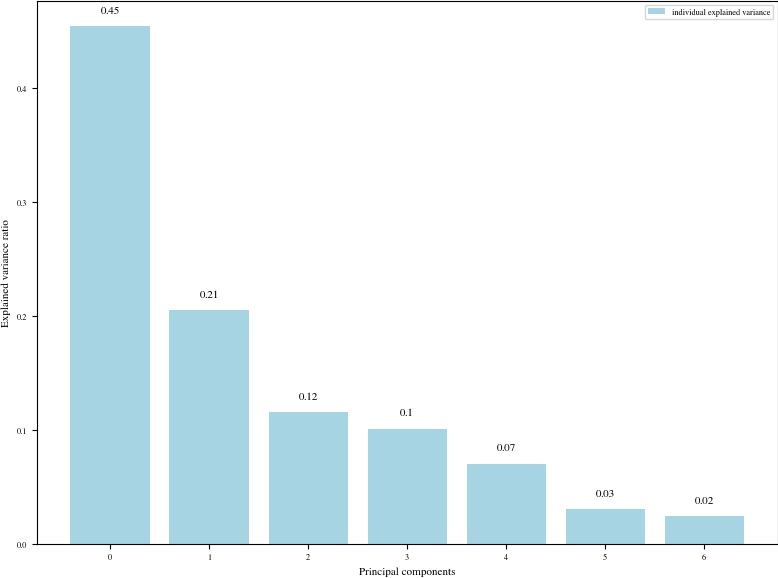

In [46]:
from sklearn.decomposition import PCA

# Assuming train_df is your DataFrame
data = train_df.values

# Perform PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(data)

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.rcParams.update(bundles.icml2022(column="half", nrows=8, ncols=6, usetex=False))
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(range(7), explained_variance, alpha=0.5, align='center', label='individual explained variance', color=rgb.tue_lightblue)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pca_explained_variance.pdf')
plt.show()



In [28]:
from sklearn.decomposition import PCA


# Convert new_point to a 1-D array
new_point_loc = new_point.flatten()

# Initialize PCA - you can change the number of components as needed
pca = PCA(n_components=3)

# Fit PCA on your data and transform the data
train_df_pca = pca.fit_transform(train_df)

# Transform the new_point using the same PCA object
new_point_pca = pca.transform(new_point_loc.reshape(1, -1))

# Initialize an empty list to store the distances
distances = []

# Calculate Euclidean distance for each point in the dataframe
for point in train_df_pca:
    distance = np.sqrt(np.sum((point - new_point_pca) ** 2))
    distances.append(distance)

# Create a new dataframe with distances
df_distances = pd.DataFrame(distances, columns=['Distance'], index=train_df.index)

# Sort the dataframe by distance
df_distances = df_distances.sort_values(by='Distance')

# Print the sorted dataframe
df_distances.head(10)


/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,Distance
city_ascii,
Lisbon,0.155446
Porto,0.172692
Warsaw,0.199313
Tokyo,0.200160
Seoul,0.235008
Beijing,0.256015
Shanghai,0.264341
Valencia,0.303542
Prague,0.304543


In [29]:
# Storing PCA wieghts for use in new sample points
train_df_pca = pd.DataFrame(train_df_pca)
train_df_pca['city_ascii'] = train_df.index

# Save DataFrame to CSV
train_df_pca.to_csv('train_df_pca.csv', index=False)

In [30]:
from joblib import dump, load

# Save the trained PCA model
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [31]:
# trying out the stored PCA weights 

train_df_pca = pd.read_csv('train_df_pca.csv')

city_ascii = train_df_pca['city_ascii'].to_list()

train_numpy_pca = train_df_pca.drop(['city_ascii'], axis=1).values

# Load the trained PCA model
pca_loaded = load('pca_model.joblib') 

# Convert new_point to a 1-D array
new_point_loc = new_point.flatten()

# Transform the new_point using the same PCA object
new_point_pca = pca_loaded.transform(new_point_loc.reshape(1, -1))

# Initialize an empty list to store the distances
distances = []

# Calculate Euclidean distance for each point in the dataframe
for point in train_numpy_pca:
    distance = np.sqrt(np.sum((point - new_point_pca) ** 2))
    distances.append(distance)

# Create a new dataframe with distances
df_distances = pd.DataFrame(distances, columns=['Distance'], index=city_ascii)

# Sort the dataframe by distance
df_distances = df_distances.sort_values(by='Distance')

# Print the sorted dataframe
df_distances.head(10)

/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,Distance
Lisbon,0.155446
Porto,0.172692
Warsaw,0.199313
Tokyo,0.200160
Seoul,0.235008
Beijing,0.256015
Shanghai,0.264341
Valencia,0.303542
Prague,0.304543
Madrid,0.309544


In [32]:
print(new_point_pca)

[[-0.08400094 -0.16285541  0.24592992]]


In [33]:
train_df_pca.head()

,0,1,2,city_ascii
0,0.057916,0.700462,0.123981,Honolulu
1,-0.467029,0.325887,-0.362557,Seattle
2,-0.415673,0.116669,0.071707,Canberra
3,-0.224100,0.256135,0.101419,Adelaide
4,-0.599041,0.150882,-0.151476,Boston


In [34]:
import plotly.graph_objects as go

# Create a trace for the original PCA transformed points
trace1 = go.Scatter3d(
    x=train_df_pca.iloc[:, 0],
    y=train_df_pca.iloc[:, 1],
    z=train_df_pca.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color='blue',                # set color to blue
        opacity=0.1                   # set opacity to make points faint
    ),
    text=train_df_pca['city_ascii'],  # add labels
    hoverinfo='text',
    name='Dataset Cities'
)

# Create a trace for the new point
trace2 = go.Scatter3d(
    x=[new_point_pca[0][0]],
    y=[new_point_pca[0][1]],
    z=[new_point_pca[0][2]],
    mode='markers',
    marker=dict(
        size=10,
        color='red',                 # set color to red
    ),
    name='Ideal City'
)

# Define the layout
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

# Create the figure and add traces
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()
